<a href="https://colab.research.google.com/github/Rahul-dsml/Myprojects/blob/main/Medical_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Personal Dataset

### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


### Reading and understanding the dataset

In [2]:
df= pd.read_csv('/content/drive/MyDrive/Machine_Learning/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Data Cleaning

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data Types seems to be correct

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values

### Data Visualization

In [9]:
num_col= list(df.select_dtypes(['int64', 'float64']).columns)
num_col

['age', 'bmi', 'children', 'charges']

In [10]:
cat_col= list(df.select_dtypes('object').columns)
cat_col

['sex', 'smoker', 'region']

#### Univariate Analysis

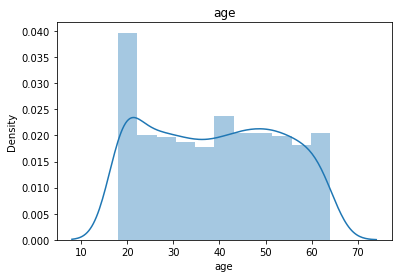

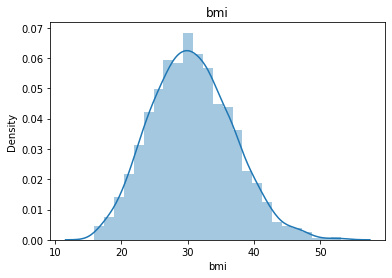

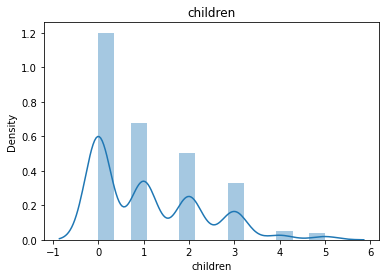

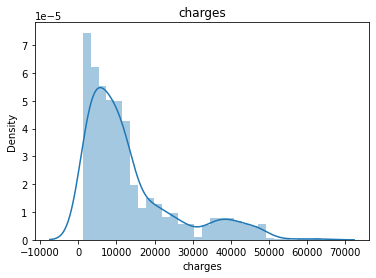

In [11]:
for col in num_col:
  plt.title(col)
  sns.distplot(df[col])
  plt.show()

1. BMI and Age seems to be normal distribution.
2. Children is a ordinal categorical column
3. Target column 'Charges' seems to have a positive skewed distribution.

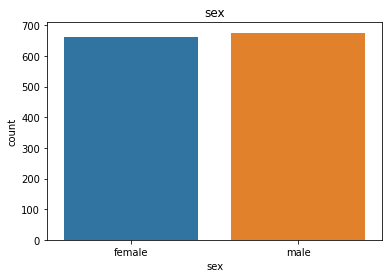

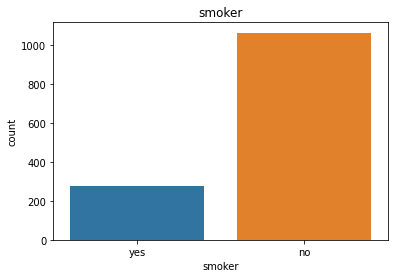

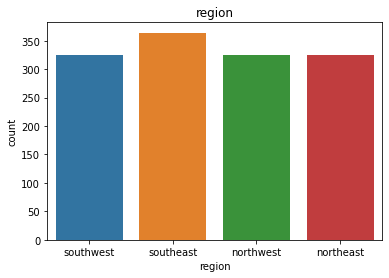

In [12]:
for col in cat_col:
  plt.title(col)
  sns.countplot(df[col])
  plt.show()

In [13]:
df['smoker'].value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

1. Sex and Region are balanced categorical variables.
2. According to data 80 % of people are non-smokers.

In [14]:
df.age.sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [15]:
def age_cat(x):
  if x < 21:
    return 'teen'
  elif x < 31:
    return '20+'
  elif x < 41:
    return '30+'
  elif x <51:
    return '40+'
  elif x < 61:
    return '50+'
  else:
    return '60+'

df.age= df.age.apply(age_cat)
df.age.value_counts()

40+     281
20+     278
50+     265
30+     257
teen    166
60+      91
Name: age, dtype: int64

In [16]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [17]:
def child(x):
  if x == 0:
    return 'No_child'
  elif x in [1, 2]:
    return 'max_2'
  else:
    return 'more_than_2'
df.children= df.children.apply(child)
df.children.value_counts()

No_child       574
max_2          564
more_than_2    200
Name: children, dtype: int64

### Bivariate analysis

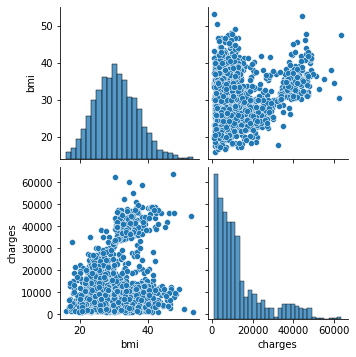

In [18]:
sns.pairplot(df)
plt.show()

BMI variable have slightly linear relationship with target variable.

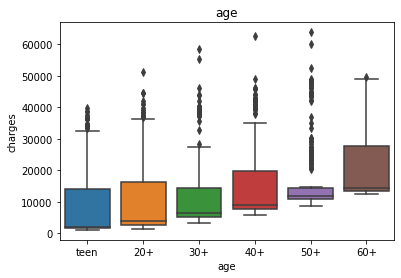

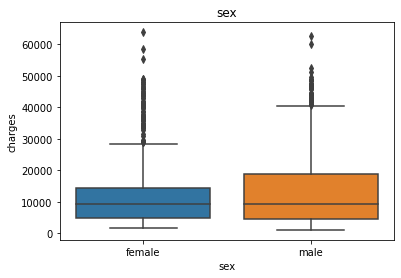

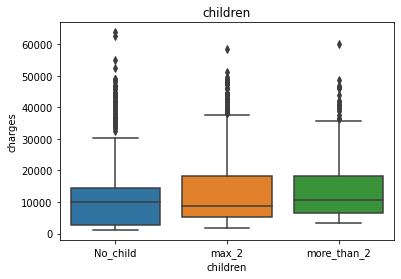

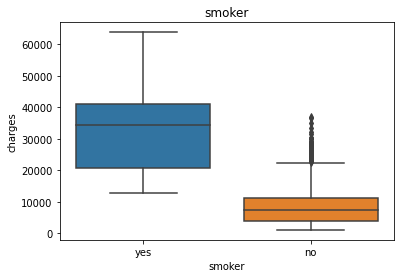

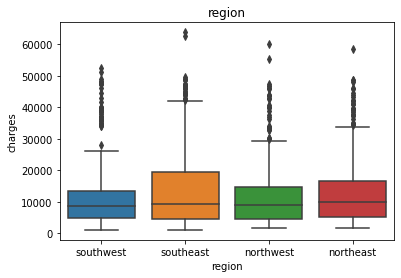

In [19]:
for col in df.select_dtypes('object').columns:
  plt.title(col)
  sns.boxplot(data= df, x= col, y= 'charges')
  plt.show()

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,teen,female,27.900,No_child,yes,southwest,16884.92400
1,teen,male,33.770,max_2,no,southeast,1725.55230
2,20+,male,33.000,more_than_2,no,southeast,4449.46200
3,30+,male,22.705,No_child,no,northwest,21984.47061
4,30+,male,28.880,No_child,no,northwest,3866.85520


### Outliers detection

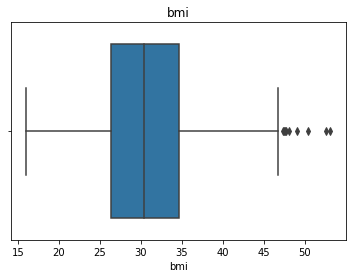

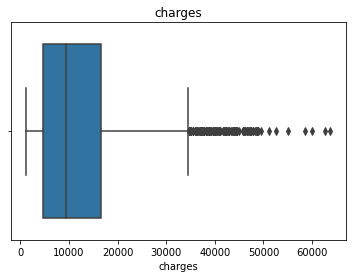

In [21]:
for col in df.select_dtypes(exclude='object').columns:
  plt.title(col)
  sns.boxplot(df[col])
  plt.show()

### Data Preparation for Model training

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,teen,female,27.900,No_child,yes,southwest,16884.92400
1,teen,male,33.770,max_2,no,southeast,1725.55230
2,20+,male,33.000,more_than_2,no,southeast,4449.46200
3,30+,male,22.705,No_child,no,northwest,21984.47061
4,30+,male,28.880,No_child,no,northwest,3866.85520


Converting categorical variables into numerical variables

In [23]:
cat_col= list(df.select_dtypes('object').columns)
df_dummy= pd.get_dummies(df[cat_col], drop_first=True)
df_dummy.head()

,age_30+,age_40+,age_50+,age_60+,age_teen,sex_male,children_max_2,children_more_than_2,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,0,0,0,1,0,0,0,1,0,0,1
1,0,0,0,0,1,1,1,0,0,0,1,0
2,0,0,0,0,0,1,0,1,0,0,1,0
3,1,0,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,1,0,0


In [24]:
df_num= pd.concat([df, df_dummy], axis=1)
df_num.head()

,age,sex,bmi,children,smoker,region,charges,age_30+,age_40+,age_50+,age_60+,age_teen,sex_male,children_max_2,children_more_than_2,smoker_yes,region_northwest,region_southeast,region_southwest
0,teen,female,27.900,No_child,yes,southwest,16884.92400,0,0,0,0,1,0,0,0,1,0,0,1
1,teen,male,33.770,max_2,no,southeast,1725.55230,0,0,0,0,1,1,1,0,0,0,1,0
2,20+,male,33.000,more_than_2,no,southeast,4449.46200,0,0,0,0,0,1,0,1,0,0,1,0
3,30+,male,22.705,No_child,no,northwest,21984.47061,1,0,0,0,0,1,0,0,0,1,0,0
4,30+,male,28.880,No_child,no,northwest,3866.85520,1,0,0,0,0,1,0,0,0,1,0,0


In [25]:
#Dropping categorigal object columns
df_num.drop(cat_col, axis=1, inplace=True)
df_num.head()

,bmi,charges,age_30+,age_40+,age_50+,age_60+,age_teen,sex_male,children_max_2,children_more_than_2,smoker_yes,region_northwest,region_southeast,region_southwest
0,27.900,16884.92400,0,0,0,0,1,0,0,0,1,0,0,1
1,33.770,1725.55230,0,0,0,0,1,1,1,0,0,0,1,0
2,33.000,4449.46200,0,0,0,0,0,1,0,1,0,0,1,0
3,22.705,21984.47061,1,0,0,0,0,1,0,0,0,1,0,0
4,28.880,3866.85520,1,0,0,0,0,1,0,0,0,1,0,0


### Splitting the data

In [26]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_num, test_size=0.25, random_state=42)
print(df_num.shape)
print(df_train.shape, df_test.shape)

(1338, 14)
(1003, 14) (335, 14)


In [27]:
y_train= df_train.pop('charges')
X_train= df_train
print(y_train.shape, X_train.shape)

(1003,) (1003, 13)


In [28]:
y_test= df_test.pop('charges')
X_test= df_test
print(y_test.shape, X_test.shape)

(335,) (335, 13)


In [29]:
X_train.head()

,bmi,age_30+,age_40+,age_50+,age_60+,age_teen,sex_male,children_max_2,children_more_than_2,smoker_yes,region_northwest,region_southeast,region_southwest
693,23.655,0,0,0,0,0,1,0,0,0,1,0,0
1297,26.510,0,0,0,0,0,0,1,0,0,0,1,0
634,39.700,0,0,1,0,0,1,1,0,0,0,0,1
1022,36.080,0,1,0,0,0,1,1,0,1,0,1,0
178,28.900,0,1,0,0,0,0,1,0,0,0,0,1


In [30]:
X_train.describe()

,bmi,age_30+,age_40+,age_50+,age_60+,age_teen,sex_male,children_max_2,children_more_than_2,smoker_yes,region_northwest,region_southeast,region_southwest
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,30.511780,0.197408,0.209372,0.200399,0.067797,0.128614,0.504487,0.423729,0.152542,0.205384,0.245264,0.258225,0.246261
std,6.013107,0.398241,0.407063,0.400498,0.251522,0.334939,0.500229,0.494395,0.359725,0.404183,0.430458,0.437877,0.431047
min,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34.430000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,53.130000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
cols= X_train.columns
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled= pd.DataFrame(X_train_scaled, columns=cols)
X_train_scaled.head()

,bmi,age_30+,age_40+,age_50+,age_60+,age_teen,sex_male,children_max_2,children_more_than_2,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.207022,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.283831,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.638687,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.541297,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.348130,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


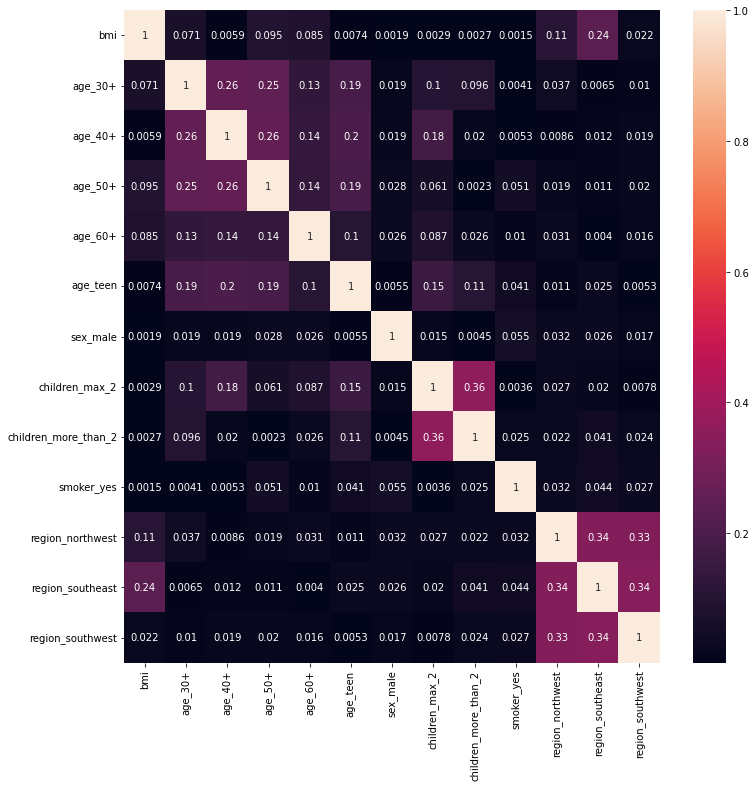

In [32]:
plt.figure(figsize=(12, 12))
sns.heatmap(abs(X_train_scaled.corr()), annot=True)
plt.show()

### Model Training


In [39]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
def build_model(X, y):
  X= sm.add_constant(X)
  lm= sm.OLS(y, X).fit()
  print(lm.summary())
  return lm

def check_vif(X):
  vif= pd.DataFrame()
  vif['Features']= X.columns
  vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['VIF']= round(vif['VIF'], 2)
  vif= vif.sort_values(by= 'VIF', ascending= False)
  return vif

In [41]:
print(X_train.shape, y_train.shape)

(1003, 13) (1003,)


In [42]:
build_model(X_train_scaled, y_train.values.reshape(-1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     222.4
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          1.36e-282
Time:                        16:51:16   Log-Likelihood:                -10162.
No. Observations:                1003   AIC:                         2.035e+04
Df Residuals:                     989   BIC:                         2.042e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  563.5483 

In [43]:
check_vif(X_train_scaled)

,Features,VIF
0,bmi,5.34
7,children_max_2,2.10
11,region_southeast,2.06
6,sex_male,1.90
2,age_40+,1.87
12,region_southwest,1.83
3,age_50+,1.79
1,age_30+,1.78
10,region_northwest,1.78
5,age_teen,1.45


In [50]:
col= list(X_train_scaled.columns)
print(col)

['bmi', 'age_30+', 'age_40+', 'age_50+', 'age_60+', 'age_teen', 'sex_male', 'children_max_2', 'children_more_than_2', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


In [51]:
# Dropping sex_male columns as it is having high p-value
col.remove('sex_male')
col

['bmi',
 'age_30+',
 'age_40+',
 'age_50+',
 'age_60+',
 'age_teen',
 'children_max_2',
 'children_more_than_2',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [52]:
build_model(X_train_scaled[col], y_train.values.reshape(-1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     241.1
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          8.60e-284
Time:                        17:10:35   Log-Likelihood:                -10162.
No. Observations:                1003   AIC:                         2.035e+04
Df Residuals:                     990   BIC:                         2.041e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  558.7632 

In [53]:
check_vif(X_train_scaled[col])

,Features,VIF
0,bmi,5.15
6,children_max_2,2.08
10,region_southeast,2.06
2,age_40+,1.86
11,region_southwest,1.82
1,age_30+,1.77
3,age_50+,1.77
9,region_northwest,1.76
5,age_teen,1.44
7,children_more_than_2,1.39


In [54]:
# Dropping region_northwest column as it is having high p-value
col.remove('region_northwest')
print(col)

['bmi', 'age_30+', 'age_40+', 'age_50+', 'age_60+', 'age_teen', 'children_max_2', 'children_more_than_2', 'smoker_yes', 'region_southeast', 'region_southwest']


In [57]:
build_model(X_train_scaled[col], y_train.values.reshape(-1))
check_vif(X_train_scaled[col])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     263.3
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          5.70e-285
Time:                        17:13:29   Log-Likelihood:                -10162.
No. Observations:                1003   AIC:                         2.035e+04
Df Residuals:                     991   BIC:                         2.041e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  450.8333 

,Features,VIF
0,bmi,4.74
6,children_max_2,2.04
2,age_40+,1.82
3,age_50+,1.73
1,age_30+,1.71
9,region_southeast,1.64
10,region_southwest,1.48
5,age_teen,1.39
7,children_more_than_2,1.38
4,age_60+,1.26


In [58]:
col.remove('age_30+')
print(col)

['bmi', 'age_40+', 'age_50+', 'age_60+', 'age_teen', 'children_max_2', 'children_more_than_2', 'smoker_yes', 'region_southeast', 'region_southwest']


In [59]:
build_model(X_train_scaled[col], y_train.values.reshape(-1))
check_vif(X_train_scaled[col])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     289.7
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          4.18e-286
Time:                        17:15:07   Log-Likelihood:                -10163.
No. Observations:                1003   AIC:                         2.035e+04
Df Residuals:                     992   BIC:                         2.040e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  645.7758 

,Features,VIF
0,bmi,4.20
5,children_max_2,1.88
8,region_southeast,1.63
1,age_40+,1.48
9,region_southwest,1.47
2,age_50+,1.46
6,children_more_than_2,1.30
4,age_teen,1.28
7,smoker_yes,1.24
3,age_60+,1.18


In [60]:
col.remove('region_southeast')
print(col)

['bmi', 'age_40+', 'age_50+', 'age_60+', 'age_teen', 'children_max_2', 'children_more_than_2', 'smoker_yes', 'region_southwest']


In [61]:
build_model(X_train_scaled[col], y_train.values.reshape(-1))
check_vif(X_train_scaled[col])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     321.5
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          5.11e-287
Time:                        17:17:15   Log-Likelihood:                -10164.
No. Observations:                1003   AIC:                         2.035e+04
Df Residuals:                     993   BIC:                         2.040e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  587.3753 

,Features,VIF
0,bmi,3.45
5,children_max_2,1.88
1,age_40+,1.48
2,age_50+,1.46
6,children_more_than_2,1.30
8,region_southwest,1.29
4,age_teen,1.28
7,smoker_yes,1.24
3,age_60+,1.17


In [62]:
col.remove('region_southwest')
print(col)

['bmi', 'age_40+', 'age_50+', 'age_60+', 'age_teen', 'children_max_2', 'children_more_than_2', 'smoker_yes']


In [63]:
build_model(X_train_scaled[col], y_train.values.reshape(-1))
check_vif(X_train_scaled[col])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     361.7
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          3.83e-288
Time:                        17:18:52   Log-Likelihood:                -10164.
No. Observations:                1003   AIC:                         2.035e+04
Df Residuals:                     994   BIC:                         2.039e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  493.8068 

,Features,VIF
0,bmi,3.30
5,children_max_2,1.87
1,age_40+,1.48
2,age_50+,1.45
6,children_more_than_2,1.30
4,age_teen,1.27
7,smoker_yes,1.24
3,age_60+,1.17


In [64]:
col.remove('children_more_than_2')
print(col)

['bmi', 'age_40+', 'age_50+', 'age_60+', 'age_teen', 'children_max_2', 'smoker_yes']


In [65]:
build_model(X_train_scaled[col], y_train.values.reshape(-1))
check_vif(X_train_scaled[col])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     409.7
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          7.02e-288
Time:                        17:20:42   Log-Likelihood:                -10168.
No. Observations:                1003   AIC:                         2.035e+04
Df Residuals:                     995   BIC:                         2.039e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            979.2762    579.614      1.

,Features,VIF
0,bmi,2.90
5,children_max_2,1.67
1,age_40+,1.46
2,age_50+,1.45
4,age_teen,1.26
6,smoker_yes,1.23
3,age_60+,1.17


Now trying with linear regression model of SKlearn

In [66]:
from sklearn.linear_model import LinearRegression
lr_model= LinearRegression()
lr_model.fit(X_train_scaled[col], y_train)

LinearRegression()

In [67]:
y_pred= lr_model.predict(X_train_scaled[col])
pred_df= pd.DataFrame(y_train)
pred_df['prediction']= y_pred
pred_df.head()

,charges,prediction
693,2352.96845,3428.927080
1297,4340.44090,5186.128435
634,9391.34600,16310.580569
1022,42211.13820,35621.651241
178,8823.27900,9650.442707


In [35]:
X_test.head()

,bmi,age_30+,age_40+,age_50+,age_60+,age_teen,sex_male,children_max_2,children_more_than_2,smoker_yes,region_northwest,region_southeast,region_southwest
764,25.175,0,1,0,0,0,0,1,0,0,0,0,0
887,30.020,1,0,0,0,0,0,0,0,0,1,0,0
890,26.885,0,0,0,1,0,0,0,0,1,1,0,0
1293,25.745,0,1,0,0,0,1,0,1,0,1,0,0
259,31.920,0,0,0,0,1,1,0,0,1,1,0,0


In [36]:
cols= X_test.columns
X_test_scaled= scaler.transform(X_test)
X_test_scaled= pd.DataFrame(X_test_scaled)
X_test_scaled.columns= cols
X_test_scaled.head()

,bmi,age_30+,age_40+,age_50+,age_60+,age_teen,sex_male,children_max_2,children_more_than_2,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.247915,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.378262,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.293920,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.263250,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.429379,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [68]:
y_test_pred= lr_model.predict(X_test_scaled[col])
test_pred_df= pd.DataFrame(y_test)
test_pred_df['prediction']= y_test_pred
test_pred_df.head()

,charges,prediction
764,9095.06825,8464.614319
887,5272.17580,5455.181493
890,29330.98315,37403.539760
1293,9301.89355,7797.738395
259,33750.29180,26954.210797


In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("-----------------TRAIN RESULTS-------------")
print("MAE: ", mean_absolute_error(pred_df.charges, pred_df.prediction))
print("MSE: ", mean_squared_error(pred_df.charges, pred_df.prediction))
print("R2 SCORE: ", r2_score(pred_df.charges, pred_df.prediction))

print("-----------------TEST RESULTS-------------")
print("MAE: ", mean_absolute_error(test_pred_df.charges, test_pred_df.prediction))
print("MSE: ", mean_squared_error(test_pred_df.charges, test_pred_df.prediction))
print("R2 SCORE: ", r2_score(test_pred_df.charges, test_pred_df.prediction))

-----------------TRAIN RESULTS-------------
MAE:  4301.319960169039
MSE:  37375118.68011741
R2 SCORE:  0.7424011494052654
-----------------TEST RESULTS-------------
MAE:  4420.862661481957
MSE:  37097653.893395305
R2 SCORE:  0.7541429273711486


### Checking the assumptions of linear regression

1. checking the linearity between dependent variable and independent variables.

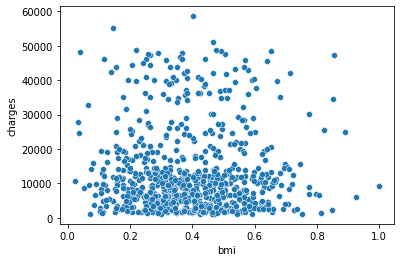

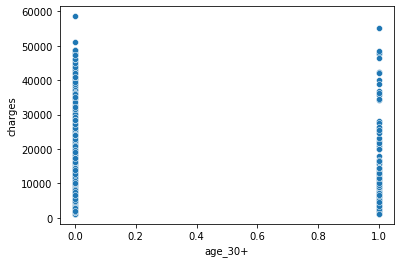

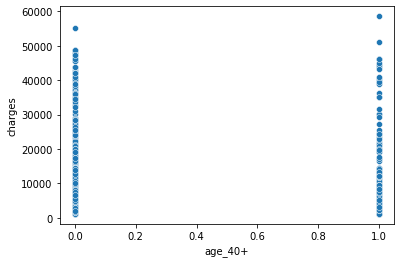

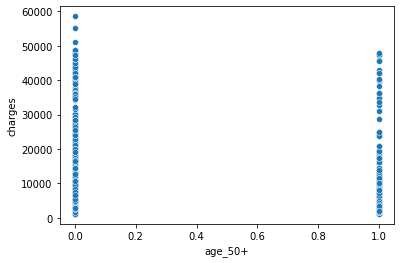

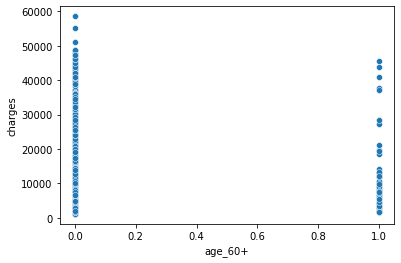

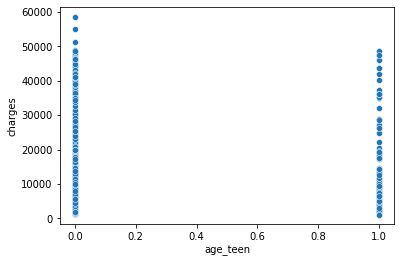

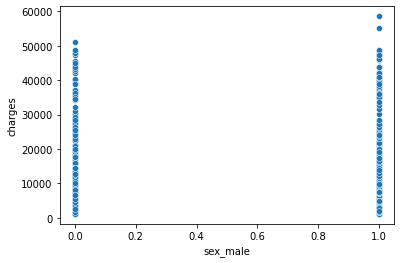

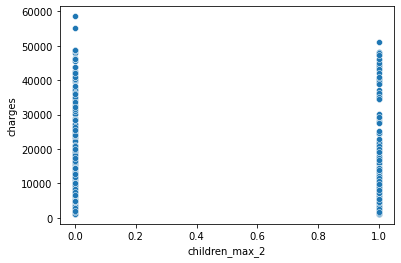

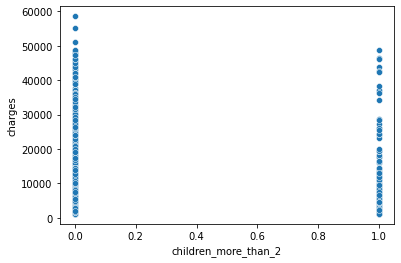

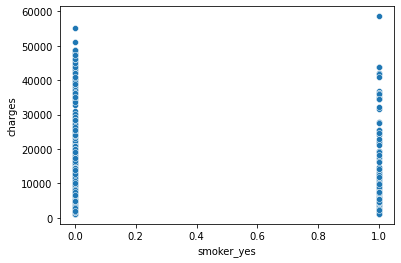

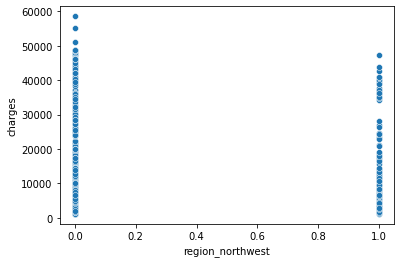

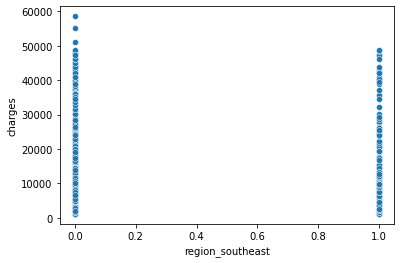

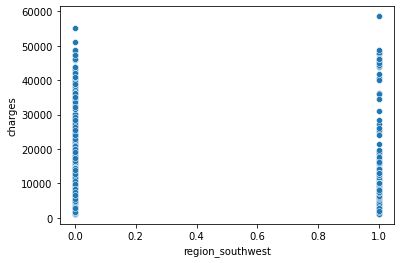

In [70]:
for col in X_train_scaled.columns:
  sns.scatterplot(x= X_train_scaled[col], y= y_train)
  plt.show()

2. Normality residual terms

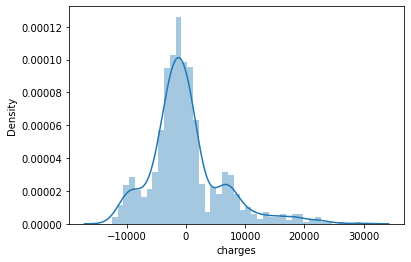

In [71]:
sns.distplot(y_train-y_pred)
plt.show()

3. Independence of error terms

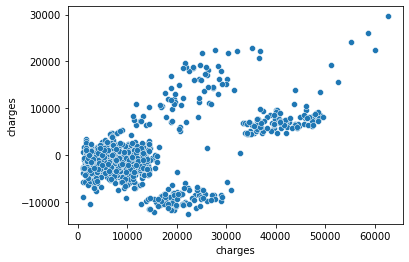

In [72]:
res= y_train- y_pred
sns.scatterplot(y_train, res)
plt.show()

### R2 score for train and test are very close, and is approximately 75 %.

### However, assumptions are not satidsfied therefore trying with Decision Tree.
## Decision Trees method 

In [73]:
X_train.head()

,bmi,age_30+,age_40+,age_50+,age_60+,age_teen,sex_male,children_max_2,children_more_than_2,smoker_yes,region_northwest,region_southeast,region_southwest
693,23.655,0,0,0,0,0,1,0,0,0,1,0,0
1297,26.510,0,0,0,0,0,0,1,0,0,0,1,0
634,39.700,0,0,1,0,0,1,1,0,0,0,0,1
1022,36.080,0,1,0,0,0,1,1,0,1,0,1,0
178,28.900,0,1,0,0,0,0,1,0,0,0,0,1


In [74]:
from sklearn.tree import DecisionTreeRegressor
tree= DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [75]:
y_pred_tree= tree.predict(X_train)
pred_df= pd.DataFrame(y_train)
pred_df['prediction']= y_pred_tree
pred_df.head()

,charges,prediction
693,2352.96845,2352.96845
1297,4340.44090,4340.44090
634,9391.34600,9391.34600
1022,42211.13820,42211.13820
178,8823.27900,8823.27900


In [78]:
y_pred_test= tree.predict(X_test)
test_pred_df= pd.DataFrame(y_test)
test_pred_df['prediction']= y_pred_test
test_pred_df.head()

,charges,prediction
764,9095.06825,7045.49900
887,5272.17580,3704.35450
890,29330.98315,28950.46920
1293,9301.89355,14478.33015
259,33750.29180,33732.68670


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("-----------------TRAIN RESULTS-------------")
print("MAE: ", mean_absolute_error(pred_df.charges, pred_df.prediction))
print("MSE: ", mean_squared_error(pred_df.charges, pred_df.prediction))
print("R2 SCORE: ", r2_score(pred_df.charges, pred_df.prediction))

print("-----------------TEST RESULTS-------------")
print("MAE: ", mean_absolute_error(test_pred_df.charges, test_pred_df.prediction))
print("MSE: ", mean_squared_error(test_pred_df.charges, test_pred_df.prediction))
print("R2 SCORE: ", r2_score(test_pred_df.charges, test_pred_df.prediction))

-----------------TRAIN RESULTS-------------
MAE:  109.12678634097708
MSE:  804318.458613743
R2 SCORE:  0.9944564320390707
-----------------TEST RESULTS-------------
MAE:  3115.5007910716417
MSE:  38419867.59906435
R2 SCORE:  0.7453802279293003


OVERFITTING!!!

In [85]:
from sklearn.model_selection import GridSearchCV, cross_val_score
tree= DecisionTreeRegressor(random_state=42)
parameters= {
    'max_depth': [5, 6, 7, 8],
    'min_samples_split': [40, 50, 60, 70, 100]
}
gstree= GridSearchCV(tree, param_grid=parameters, cv= 5, verbose=1, scoring='neg_mean_squared_error')
gstree.fit(X_train, y_train)
gstree.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 5, 'min_samples_split': 50}

In [94]:
gstree= DecisionTreeRegressor(max_depth=5, min_samples_split=50, random_state=42, criterion='squared_error')
gstree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=50, random_state=42)

In [96]:
y_pred_tree= gstree.predict(X_train)
pred_df= pd.DataFrame(y_train)
pred_df['prediction']= y_pred_tree
pred_df.head()

,charges,prediction
693,2352.96845,5904.758924
1297,4340.44090,5904.758924
634,9391.34600,12622.308910
1022,42211.13820,43163.528469
178,8823.27900,10460.479106


In [97]:
y_pred_test= gstree.predict(X_test)
test_pred_df= pd.DataFrame(y_test)
test_pred_df['prediction']= y_pred_test
test_pred_df.head()

,charges,prediction
764,9095.06825,10460.479106
887,5272.17580,5904.758924
890,29330.98315,28772.987450
1293,9301.89355,10460.479106
259,33750.29180,38411.278398


In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("-----------------TRAIN RESULTS-------------")
print("MAE: ", mean_absolute_error(pred_df.charges, pred_df.prediction))
print("MSE: ", mean_squared_error(pred_df.charges, pred_df.prediction))
print("R2 SCORE: ", r2_score(pred_df.charges, pred_df.prediction))

print("-----------------TEST RESULTS-------------")
print("MAE: ", mean_absolute_error(test_pred_df.charges, test_pred_df.prediction))
print("MSE: ", mean_squared_error(test_pred_df.charges, test_pred_df.prediction))
print("R2 SCORE: ", r2_score(test_pred_df.charges, test_pred_df.prediction))

-----------------TRAIN RESULTS-------------
MAE:  2741.4095775032424
MSE:  20879649.036929023
R2 SCORE:  0.8560921334118563
-----------------TEST RESULTS-------------
MAE:  2806.149351902354
MSE:  23462610.895061027
R2 SCORE:  0.8445063710102572


### R2 Score is 85.6 % for training set and 84.5 % for test dataset.
### It is a good model.

In [100]:
gstree.feature_names_in_

array(['bmi', 'age_30+', 'age_40+', 'age_50+', 'age_60+', 'age_teen',
       'sex_male', 'children_max_2', 'children_more_than_2', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype=object)

In [104]:
result= pd.DataFrame({'Features': gstree.feature_names_in_,
                     'coefficient': gstree.feature_importances_})
result[result.coefficient > 0].sort_values(by= 'coefficient', ascending=False)

,Features,coefficient
9,smoker_yes,0.714285
0,bmi,0.179554
4,age_60+,0.037313
3,age_50+,0.037024
2,age_40+,0.025188
5,age_teen,0.004942
7,children_max_2,0.001098
8,children_more_than_2,0.000595


## Conclusion: Smokers have more medical cost.